In [1]:
from IPython.display import Image, clear_output
import os
import shutil
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.image as mpimg
import time
import string
import re

In [2]:
"""Move all files from source folder to destionation folder"""
def move_all(source_dir, destination_dir, ftype='all'):
    file_names = os.listdir(source_dir)
    types = ['txt', 'png']
    if ftype == 'all':
        for file_name in file_names:
            shutil.move(os.path.join(source_dir, file_name), destination_dir)
        return
    if ftype not in types:
        print(f"File endwith {ftype} doesn't support!")
        return
    for file_name in file_names:
        if file_name.endswith(ftype):
            shutil.move(os.path.join(source_dir, file_name), destination_dir)

In [3]:
print("Number of images in the folder", len(os.listdir('./dataset/img')))
print("Number of labels in the folder", len(os.listdir('./dataset/txt')))

Number of images in the folder 5018
Number of labels in the folder 5713


In [4]:
"""Because of the imbalance between the number of images and the number of label, we need to remove some redundancy"""
source_dir = './dataset/txt'
target_dir = './dataset/img'
# move all caption files to image folder    
move_all(source_dir, target_dir, 'txt')

In [5]:
print("Number of images in the folder", len(os.listdir('./dataset/img')))
print("Number of labels in the folder", len(os.listdir('./dataset/txt')))

Number of images in the folder 10731
Number of labels in the folder 0


In [6]:
target_dir = './dataset/img'
file_names = os.listdir(target_dir)
images = []
labels = []    
for idx, file_name in enumerate(file_names):
    if file_name.endswith('txt'):
        name = file_name.split('.')[:-1]
        images.append(''.join(name)+'.')
    else:
        name = file_name.split('.')[:-1]
        labels.append(''.join(name)+'.')

redundancy = list(set(images) - set(labels))
print(redundancy)

['23654.', '29371.', '27355.', '28435.', '26532.', '29213.', '24375.', '27292.', '27260.', '26910.', '27609.', '24475.', '25603.', '27151.', '29353.', '28411.', '25675.', '24050.', '24925.', '30233.', '23971.', '30035.', '25711.', '27431.', '28697.', '23806.', '27842.', '26418.', '24690.', '30732.', '27429.', '30829.', '29356.', '30957.', '26980.', '24088.', '27388.', '28762.', '27144.', '30012.', '31008.', '23562.', '25667.', '30136.', '27890.', '27554.', '28475.', '30028.', '29622.', '27962.', '23586.', '28406.', '30321.', '25991.', '25888.', '28202.', '30870.', '24786.', '27848.', '26979.', '25223.', '27138.', '27250.', '27824.', '29163.', '28290.', '25790.', '30756.', '30142.', '23987.', '28055.', '30631.', '24863.', '25751.', '28109.', '28404.', '30887.', '23818.', '29701.', '23612.', '26942.', '30152.', '26157.', '24044.', '29385.', '23616.', '30547.', '25957.', '25458.', '29284.', '30107.', '24760.', '26727.', '26723.', '24472.', '26446.', '29402.', '23541.', '30056.', '28548.',

In [7]:
print(len(redundancy))

695


In [8]:
# remove redundancy files
for redundant_file in redundancy:
    os.remove('./dataset/img/' + redundant_file +'txt')

In [9]:
source_dir = './dataset/img'
target_dir = './dataset/txt'
# move all label files to image folder    
move_all(source_dir, target_dir, 'txt')

In [10]:
print("Number of images in the folder", len(os.listdir('./dataset/img')))
print("Number of labels in the folder", len(os.listdir('./dataset/txt')))

Number of images in the folder 5018
Number of labels in the folder 5018


In [11]:
# text lowercase
def text_lowercase(text):
    return text.lower()

# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
# remove whitespace from text
def remove_whitespace(text):
    return  " ".join(text.split())

In [12]:
def preprocessing_text(current_path: str):
    
    """Preprocess text by some techniques: lowercase, remove punctuation, remove white space
        
        ---------------
        Args: 
        @current_path current path of caption txt files
        
        ---------------
        Return:
        @id_corpus: list of id 
        @corpus: list of corpus
    
    """
    
    corpus = []
    id_corpus = []
    for file_name in sorted(os.listdir(current_path)):
        """ We don't use utf-8. Use cp1252 instead.
        https://stackoverflow.com/questions/46000191/utf-8-codec-cant-decode-byte-0x92-in-position-18-invalid-start-byte

        If you want to use utf-8, add try-catch exception to avoid decode error
        """
        lines = open(os.path.join(current_path, file_name), 'r', encoding='cp1252')
        temp_str = ''
        try:
            for line in lines:
                if line[-1] == '\n': # if last character is endline character
                    temp_str += line[:-1] + ' ' # delete endline character
                else:
                    temp_str += line
            temp_str = text_lowercase(temp_str)
            temp_str = remove_punctuation(temp_str)
            temp_str = remove_whitespace(temp_str)
            corpus.append(temp_str)
            id_corpus.append(str(file_name[:-4]))
            lines.close()
        except:
            pass
        
    return (corpus, id_corpus)

In [13]:
corpus, id_corpus = preprocessing_text('./dataset/txt')

In [14]:
print(len(corpus))
print(len(id_corpus))

5018
5018


In [16]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())
print(X.shape)

['00' '00011420' '0047' ... 'zoomtext' 'zucca' 'zylo']
(5018, 9496)


In [17]:
noisy_words = vectorizer.get_feature_names_out()
noisy_words = noisy_words[:350].tolist()
noisy_words

['00',
 '00011420',
 '0047',
 '0216',
 '025332334497912',
 '02577039',
 '026svdv2158001c5',
 '03',
 '03262014',
 '039',
 '042513',
 '0449',
 '04702582be',
 '0518',
 '06',
 '07',
 '07252011',
 '07e536yf11717',
 '0800828282',
 '09',
 '0946',
 '0g',
 '10',
 '100',
 '10001',
 '100180',
 '100312',
 '100g',
 '100p',
 '100s',
 '101',
 '1024',
 '103',
 '103012',
 '104',
 '105',
 '1056',
 '107',
 '109',
 '1098e',
 '1099',
 '10g',
 '10mg',
 '11',
 '1101',
 '1111',
 '111111',
 '1150',
 '11543',
 '11612',
 '11th',
 '12',
 '120',
 '1209pm',
 '121',
 '1218',
 '12289',
 '12291',
 '123111',
 '125',
 '128',
 '129',
 '12ounce',
 '12pack',
 '12pm',
 '12pm3pm',
 '13',
 '130',
 '130x16',
 '14',
 '1402',
 '145',
 '1475',
 '14g',
 '14th',
 '15',
 '150',
 '1503c',
 '150g',
 '1520',
 '1545',
 '15g',
 '15piece',
 '16',
 '160',
 '160gb',
 '1621',
 '165',
 '167',
 '16gb',
 '17',
 '175',
 '17inch',
 '18',
 '180',
 '1813',
 '18431',
 '185',
 '1863',
 '18663603226',
 '1878',
 '18g',
 '19',
 '190',
 '191211',
 '1940s

In [19]:
#Vector Space representation
import pandas as pd
vector = X
df1 = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out())
df1

,00,00011420,0047,0216,025332334497912,02577039,026svdv2158001c5,03,03262014,039,...,zofia,zoldem,zolpidem,zone,zoo,zoom,zoomed,zoomtext,zucca,zylo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.236579,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [20]:
#loading basic packages
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\huynh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\huynh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [21]:
print(stopwords.words('english'))
stop_words = set(stopwords.words('english') + noisy_words)
print(stop_words)
print(len(stop_words))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
# this function returns a list of tokenized and stemmed words of any text
def get_tokenized_list(doc_text):
    tokens = nltk.word_tokenize(doc_text)
    return tokens

# This function will performing stemming on tokenized words
def word_stemmer(token_list):
    ps = nltk.stem.PorterStemmer()
    stemmed = []
    for words in token_list:
        stemmed.append(ps.stem(words))
    return stemmed

In [23]:
# Function to remove stopwords from tokenized word list
def remove_stopwords(doc_text):
    cleaned_text = []
    for words in doc_text:
        if words not in stop_words:
            cleaned_text.append(words)
    return cleaned_text

In [24]:
#Check for single document
tokens = get_tokenized_list(corpus[1])
print("WORD TOKENS:")
print(tokens)
doc_text = remove_stopwords(tokens)
print("\nAFTER REMOVING STOPWORDS:")
print(doc_text)
print("\nAFTER PERFORMING THE WORD STEMMING::")
doc_text = word_stemmer(doc_text)
doc_text

WORD TOKENS:
['a', 'person', 'is', 'holding', 'a', 'bottle', 'that', 'has', 'medicine', 'for', 'the', 'night', 'time', 'a', 'bottle', 'of', 'medication', 'has', 'a', 'white', 'twist', 'top', 'night', 'time', 'medication', 'bottle', 'being', 'held', 'by', 'someone', 'a', 'person', 'holding', 'a', 'small', 'black', 'bottle', 'of', 'night', 'time', 'a', 'bottle', 'of', 'what', 'appears', 'to', 'be', 'cough', 'syrup', 'held', 'in', 'hand']

AFTER REMOVING STOPWORDS:
['person', 'holding', 'bottle', 'medicine', 'night', 'time', 'bottle', 'medication', 'white', 'twist', 'top', 'night', 'time', 'medication', 'bottle', 'held', 'someone', 'person', 'holding', 'small', 'black', 'bottle', 'night', 'time', 'bottle', 'appears', 'cough', 'syrup', 'held', 'hand']

AFTER PERFORMING THE WORD STEMMING::


['person',
 'hold',
 'bottl',
 'medicin',
 'night',
 'time',
 'bottl',
 'medic',
 'white',
 'twist',
 'top',
 'night',
 'time',
 'medic',
 'bottl',
 'held',
 'someon',
 'person',
 'hold',
 'small',
 'black',
 'bottl',
 'night',
 'time',
 'bottl',
 'appear',
 'cough',
 'syrup',
 'held',
 'hand']

In [25]:
doc_ = ' '.join(doc_text)
doc_

'person hold bottl medicin night time bottl medic white twist top night time medic bottl held someon person hold small black bottl night time bottl appear cough syrup held hand'

In [26]:
cleaned_corpus = []
for doc in corpus:
    tokens = get_tokenized_list(doc)
    doc_text = remove_stopwords(tokens)
    doc_text  = word_stemmer(doc_text)
    doc_text = ' '.join(doc_text)
    cleaned_corpus.append(doc_text)
cleaned_corpus

['comput screen show repair prompt screen comput screen repair automat pop partial comput screen show need repair part comput monitor show comput repair messag top laptop blue background dark blue text',
 'person hold bottl medicin night time bottl medic white twist top night time medic bottl held someon person hold small black bottl night time bottl appear cough syrup held hand',
 'white paper show imag black brown dog librari book pictur two dog cover wooden tabl book black tan dog walk snowi street book cover show two dog snow book cover titl dog year imag black brown dog walk street left side due date sticker librari',
 'white box left blue box wooden tabl small rectangular red white box next small rectangular blue box wooden surfac two box medicin one white red blue sit tabl two box appear contain medic eye drop two box pharmaceut product left tabl',
 'close comput monitor power monitor messag display pictur screenshot show error messag app comput screen display error say display 

In [27]:
vectorizerX = TfidfVectorizer()
vectorizerX.fit(cleaned_corpus)
doc_vector = vectorizerX.transform(cleaned_corpus)
print(vectorizerX.get_feature_names_out())

print(doc_vector.shape)

['aadvantag' 'ab' 'abandon' ... 'zoomtext' 'zucca' 'zylo']
(5018, 6790)


In [28]:
df1 = pd.DataFrame(doc_vector.toarray(), columns=vectorizerX.get_feature_names_out())
df1

,aadvantag,ab,abandon,abba,abbott,abiot,abl,abraham,abstract,ac,...,zoe,zofia,zoldem,zolpidem,zone,zoo,zoom,zoomtext,zucca,zylo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.241519,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5016,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [31]:
def text_query(query, k=10):

    start = time.time()

    query = text_lowercase(query)
    query = remove_punctuation(query)
    query = remove_whitespace(query)
    query = get_tokenized_list(query)
    query = remove_stopwords(query)
    q = []
    for w in word_stemmer(query):
        q.append(w)
    q = ' '.join(q)
    print('Query steamed: ', q)
    query_vector = vectorizerX.transform([q])

    # calculate cosine similarities
    cosineSimilarities = cosine_similarity(doc_vector,query_vector).flatten()

    related_docs_indices = cosineSimilarities.argsort()[:-(k+1):-1]
    # print((related_docs_indices))
    # for i in related_docs_indices:
    #     data = [cleaned_corpus[i]]
    #     print(data)

    stop = time.time()
    print('Running Time: ', stop - start) 


    fig = plt.figure(figsize=(15, 6))
    for idx, id in enumerate(related_docs_indices):
        img_name = str(id_corpus[id]) + '.png'
        # print(img_name)
        # print(os.path.join('/content/img/', img_name))
        img = mpimg.imread(os.path.join('./dataset/img/', img_name))
        # cv2_imshow(img)
        fig.add_subplot(2, 5, idx+1)
        plt.title("Top #{}".format(idx+1))
        plt.imshow(img)
        plt.axis('off')

Query steamed:  monitor messag display
Running Time:  0.0029900074005126953


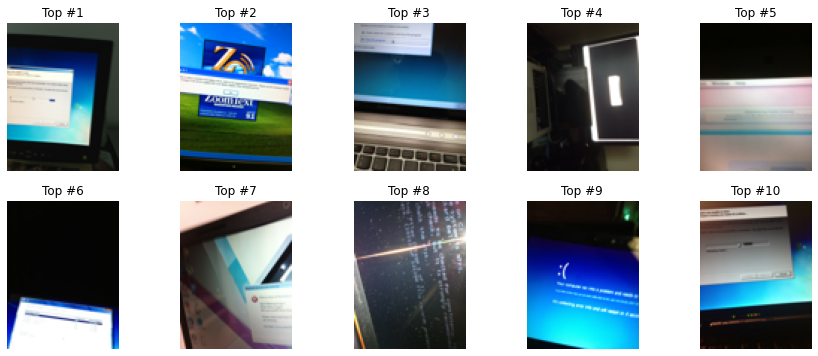

In [32]:
query = 'A monitor has a message displayed on it'
text_query(query)